<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are two major types of information visualized in plots:


1.   Distribution plot of a variable to understand its properties
2.   Joint plot of two or more variables to understand their relationships



In [1]:
import seaborn as sns

Let's look at histograms that plot frequency distribution of a variable. In this plot, we are displaying the frequency distribution of flipper_length_mm. We are color coding the different species using the *hue* property.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

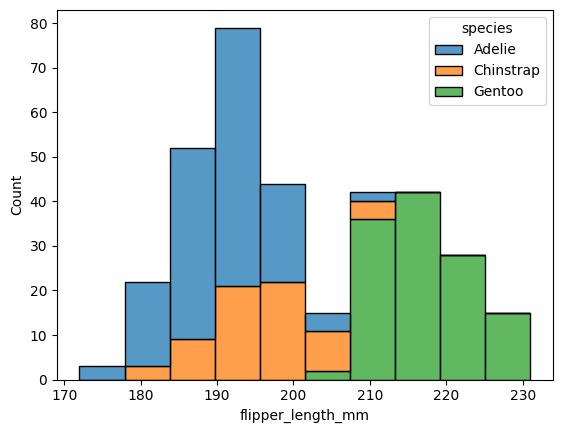

In [2]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

We can use a figure level plotting function such as *displot* to have multiple columns for different subset of data.

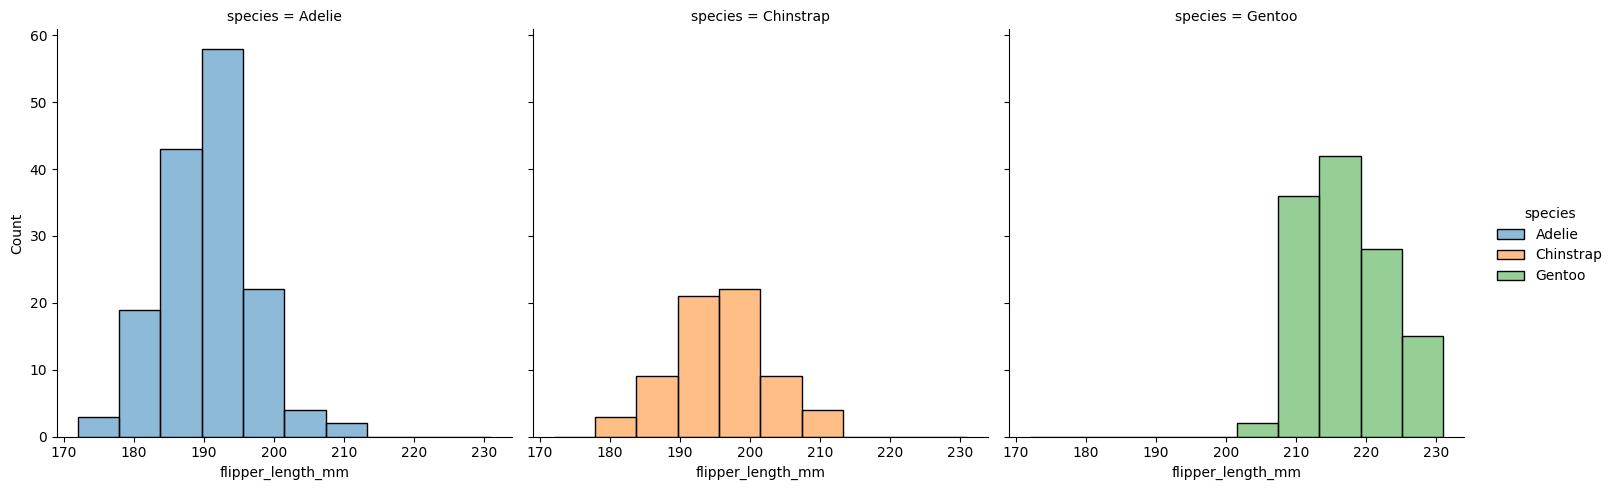

In [3]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


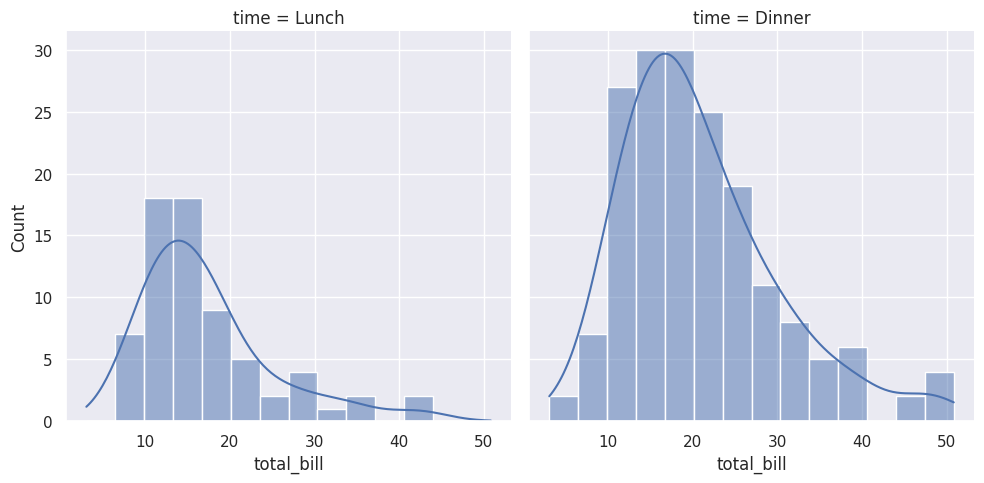

In [13]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

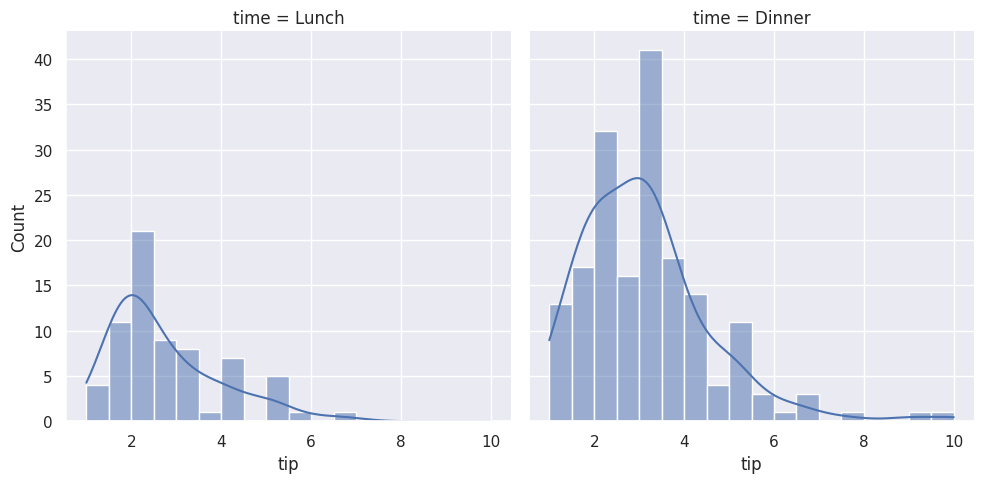

In [15]:
sns.displot(data=tips, x="tip", col="time", kde=True)

We can also make a barplot with 95% CI

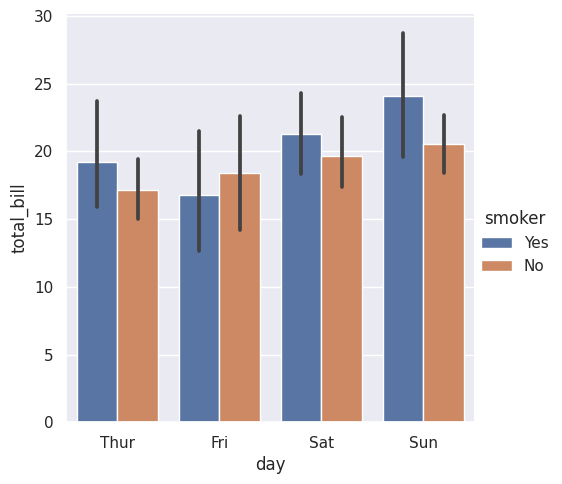

In [16]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

More important is the joint visualization of two or more variables.

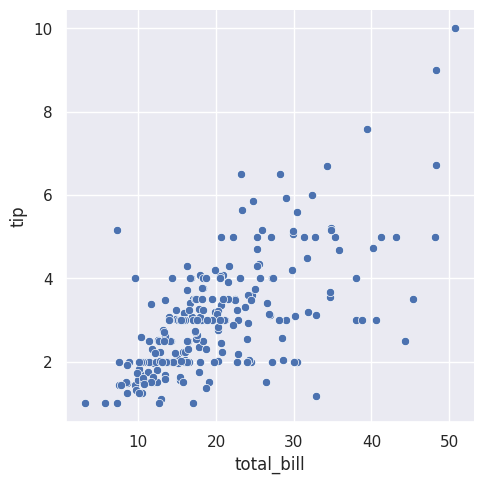

In [6]:
# Create a visualization
sns.relplot(data=tips, x="total_bill", y="tip")

We can get more details by separating time column values

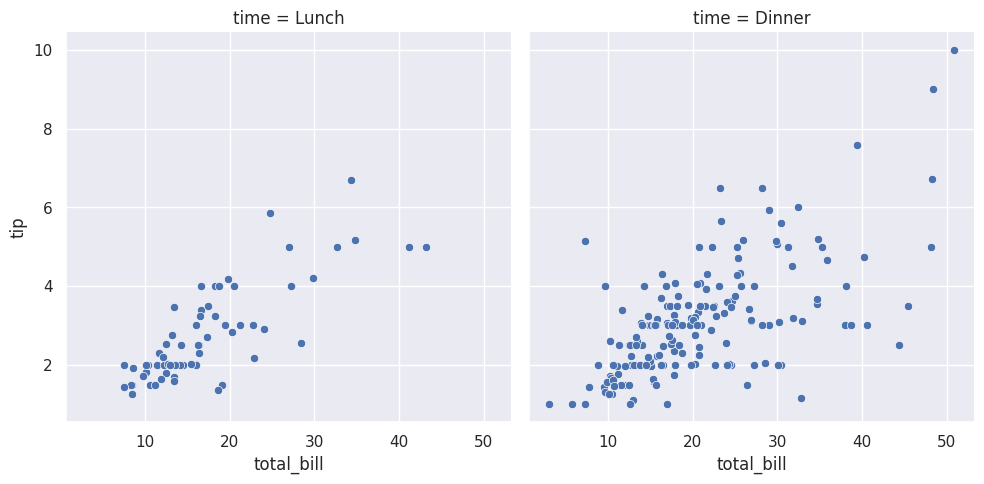

In [7]:
# Create a visualization
sns.relplot(data=tips, x="total_bill", y="tip", col="time")

Let's find more details by color coding the smoker attribute and also making the shape of the points depend on it

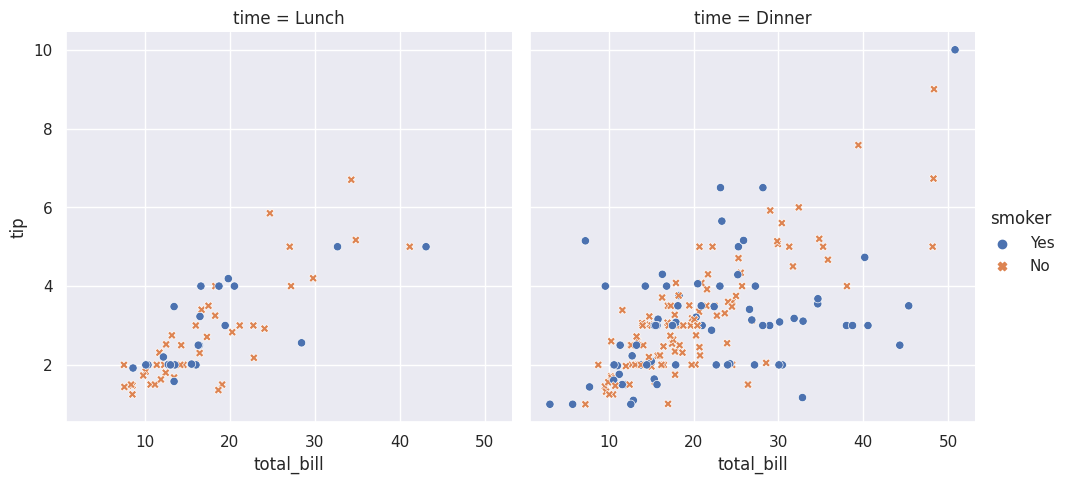

In [9]:
# Create a visualization
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker")

Is there a difference between the tipping behavior of smoker vs non-smokers? Let's do the same thing for sex

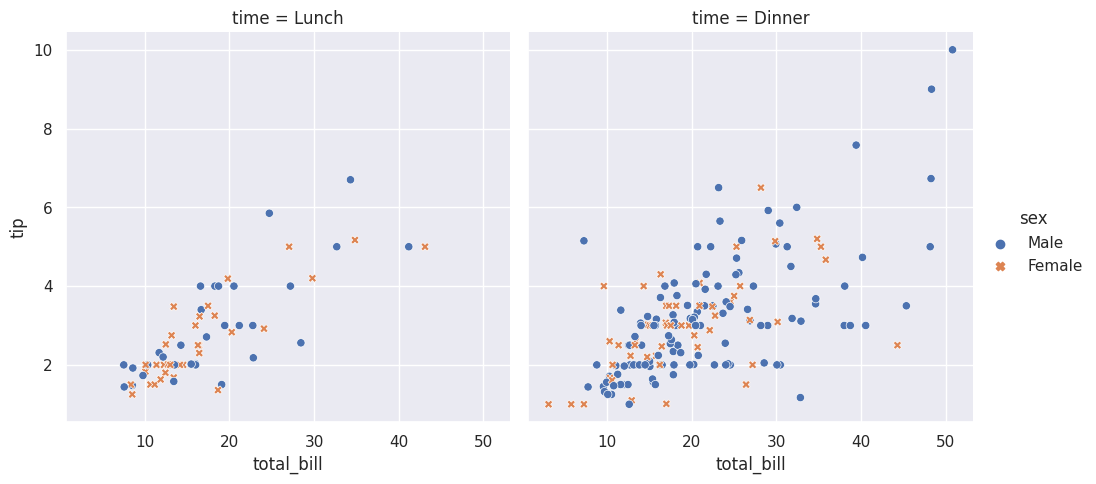

In [10]:
# Create a visualization
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="sex", style="sex")

Does the size of the party influence the tipping behavior? Let's make the size of the points proportional to the size of the party

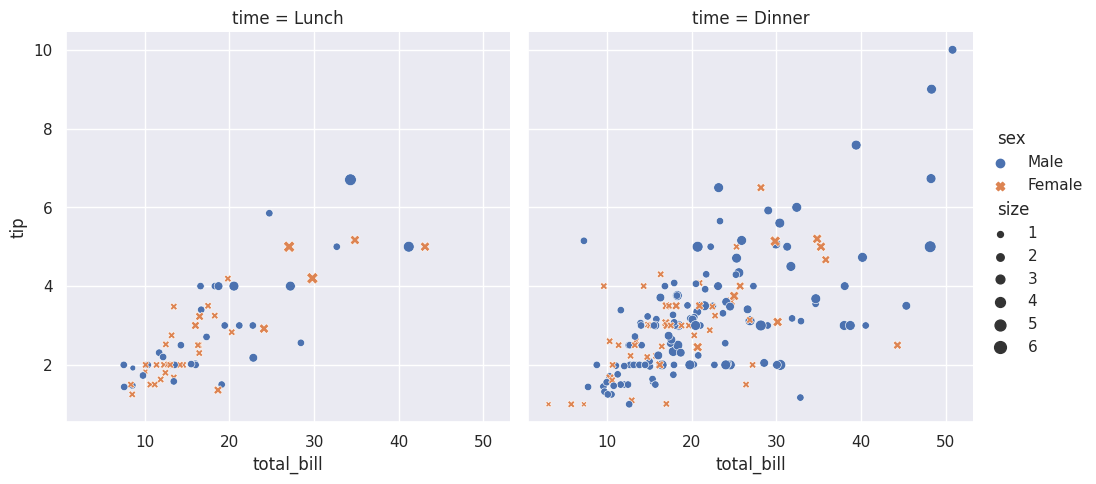

In [11]:
# Create a visualization
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="sex", style="sex", size="size")

We can plot a linear regression line between the variables.

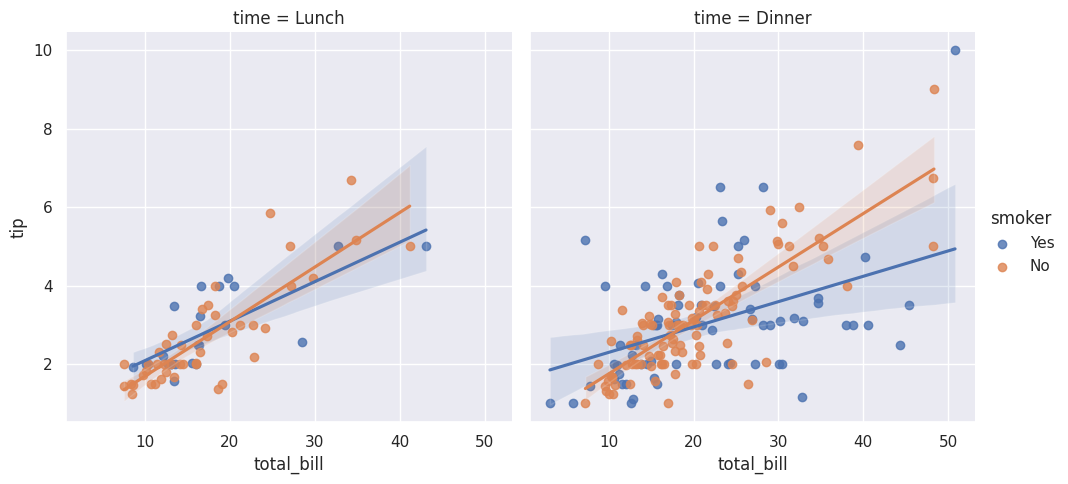

In [12]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

In [34]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)

In [35]:
df = california.frame

In [36]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<Axes: xlabel='HouseAge', ylabel='Count'>

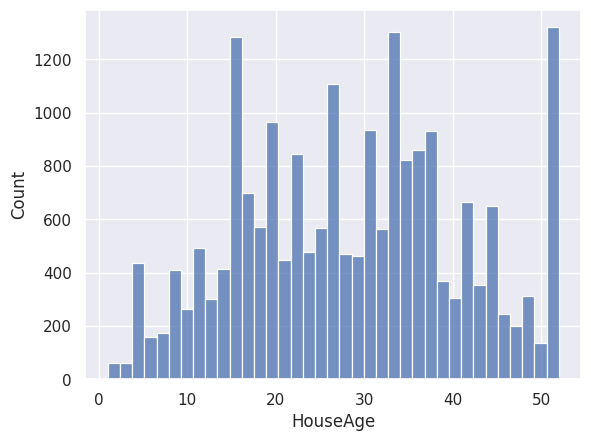

In [38]:
sns.histplot(df['HouseAge'])

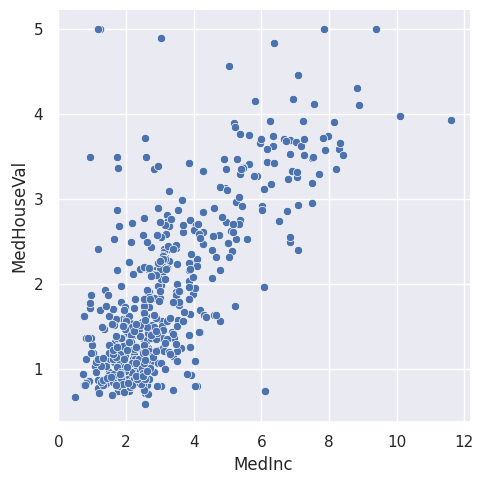

In [42]:
sns.relplot(df.loc[1:500,:], x="MedInc", y="MedHouseVal")

In [43]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

From the age field, construct a Boolean "AgeCat" that has two values - "new" and "old". You are free to choose a threshold.

In [46]:
def ageToCat(age):
  if age > 28:
    return "old"
  else:
    return "new"

In [50]:
df['AgeCat'] = df['HouseAge'].apply(ageToCat)

In [51]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,AgeCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,old
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,new
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,old
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,old
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,old
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,new
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,new
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,new
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,new


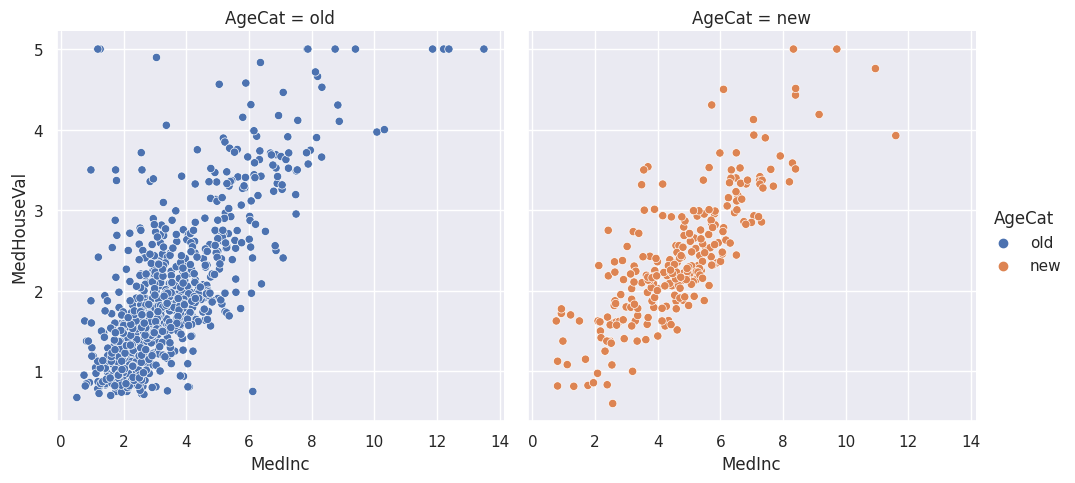

In [56]:
sns.relplot(data = df.loc[0:1000,:], x = "MedInc", y = "MedHouseVal", col = "AgeCat")

<Axes: xlabel='MedHouseVal', ylabel='Count'>

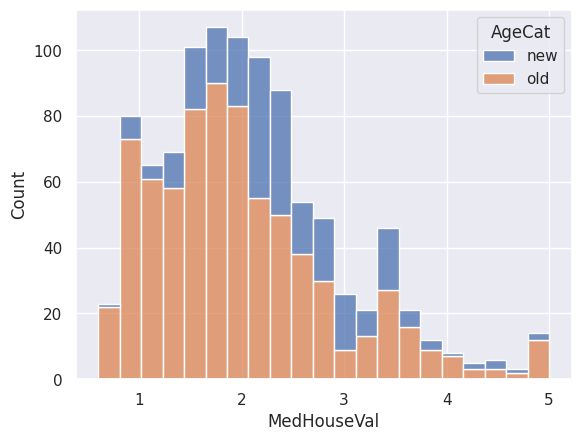

In [59]:
sns.histplot(data=df.loc[1:1000,:], x="MedHouseVal", hue="AgeCat", multiple="stack")

<Axes: xlabel='AveBedrms', ylabel='Count'>

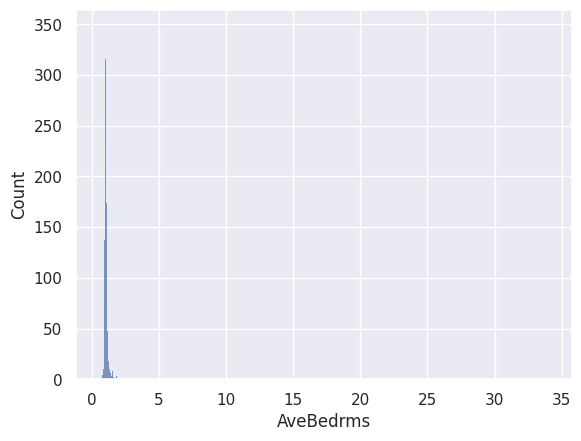

In [64]:
sns.histplot(data = df.loc[:5000,:], x = "AveBedrms" )

In [66]:
df["AveBedrms"].describe()

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64

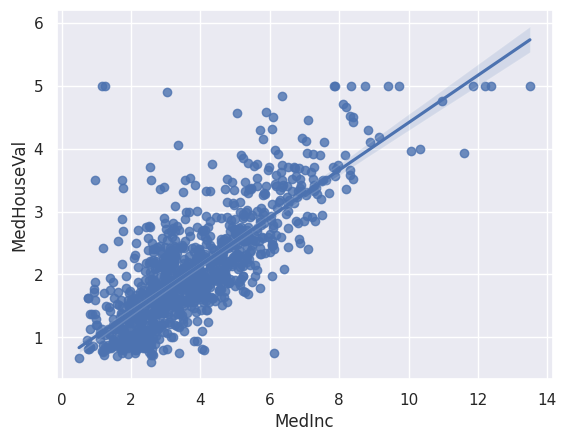

In [71]:
sns.regplot(x="MedInc", y="MedHouseVal", data=df.loc[:1000,:]);